In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/nmandi/Repos/plant-traits-kaggle


/home/nmandi/miniconda3/envs/lightning/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import lightning as L
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchmetrics import R2Score

from src.data.datasets.baseline_dataset import BaselineDataset
from src.data.datasets.plant_traits_dataset import PlantTraitsDataset
from src.modeling.baseline_model import BaselineModel
import src.viz.viz_utils as viz

In [4]:
checkpoint = "models/epoch=198-step=597.ckpt"
data_path = "data/processed/planttraits2024/train.feather"

# View Outputs

In [5]:
data_df = pd.read_feather(data_path)
baseline_dataset = BaselineDataset(data_df)
baseline_dataloader = DataLoader(baseline_dataset, batch_size=1, shuffle=False)
pt_dataset = PlantTraitsDataset(data_df)
pt_dataloader = DataLoader(pt_dataset, batch_size=1, shuffle=False)

model = BaselineModel.load_from_checkpoint(checkpoint)
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BaselineModel(
  (mlp): Sequential(
    (0): Sequential(
      (0): Linear(in_features=2211, out_features=512, bias=True)
      (1): Dropout(p=0.25, inplace=False)
      (2): ReLU()
    )
    (1): Sequential(
      (0): Linear(in_features=512, out_features=128, bias=True)
      (1): Dropout(p=0.25, inplace=False)
      (2): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=128, out_features=64, bias=True)
      (1): Dropout(p=0.25, inplace=False)
      (2): ReLU()
    )
    (3): Linear(in_features=64, out_features=6, bias=True)
  )
  (r2_score): R2Score()
)

In [61]:
# On left half, plot the image. On right, plot a bar chart with matched pairs of target and prediction.
# Pred, target are 1-D arrays of length num_plant_traits
def plot_single_output(image, target, pred):
    fig, ax = plt.subplots(1, 2, figsize=(6, 3))
    ax[0].imshow(image)
    ax[0].axis("off")

    data = pd.DataFrame({'Trait': range(len(pred)), 'Pred': np.abs(pred), 'Target': target})
    data_melted = data.melt(id_vars='Trait', value_vars=['Pred', 'Target'], var_name='Type', value_name='Value')
    sns.barplot(x='Trait', y='Value', hue='Type', data=data_melted, ax=ax[1])
    
    ax[1].set_ylim(0, 1)
    ax[1].set_title("Target vs Prediction")
    plt.show()

    print(f"Pred: {pred}")
    print(f"Target: {target}")

In [62]:
def plot_outputs(indices):
    for i in indices:
        row, target = baseline_dataset[i]
        image, _, _ = pt_dataset[i]

        row = row.to(device)
        target = target.to(device)

        pred = model(row).cpu().detach().numpy()
        target = target.cpu().detach().numpy()
        plot_single_output(image, target, pred)

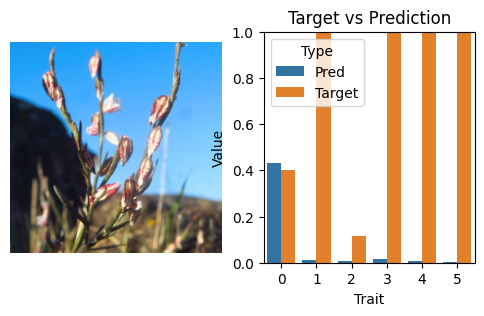

Pred: [-0.4330575  -0.01023555 -0.00949634 -0.01447691 -0.00812984 -0.0051749 ]
Target: [ 0.40175313 11.758108    0.1174843   1.2437791   1.8493754  50.216034  ]


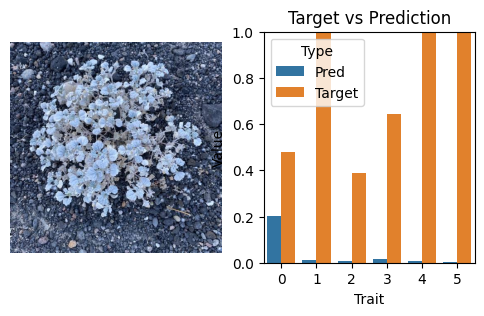

Pred: [-0.20210633 -0.01102435 -0.00950112 -0.01423585 -0.00731761 -0.00520626]
Target: [4.8033369e-01 1.5748846e+01 3.8931507e-01 6.4294028e-01 1.3534679e+00
 5.7409845e+02]


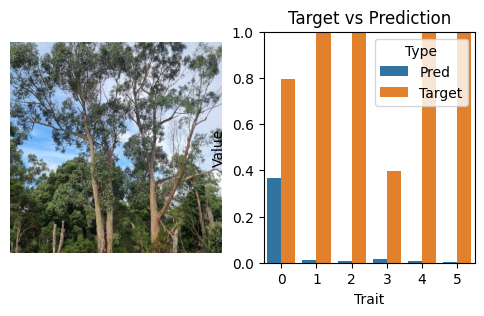

Pred: [-0.36504084 -0.01021996 -0.00841109 -0.01396687 -0.00804771 -0.00474991]
Target: [7.9691690e-01 5.2912512e+00 8.5529079e+00 3.9524123e-01 2.3431525e+00
 1.1300967e+03]


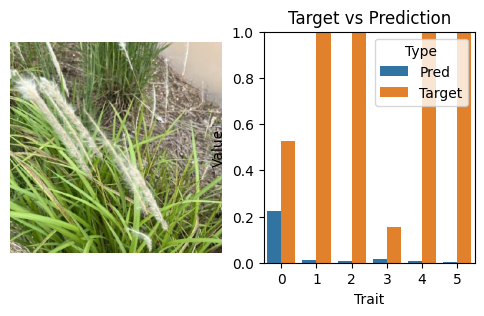

Pred: [ 0.22341996 -0.00966681 -0.00901403 -0.01429169 -0.00788932 -0.00484402]
Target: [5.2523619e-01 9.5683050e+00 1.0836287e+00 1.5420002e-01 1.1553085e+00
 1.0426865e+03]


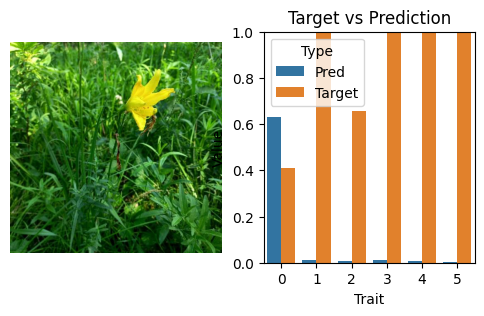

Pred: [-0.63256603 -0.00964192 -0.00746807 -0.01391423 -0.00891634 -0.00350548]
Target: [4.1182062e-01 1.4528877e+01 6.5758479e-01 1.0919967e+01 2.2462263e+00
 2.3864673e+03]


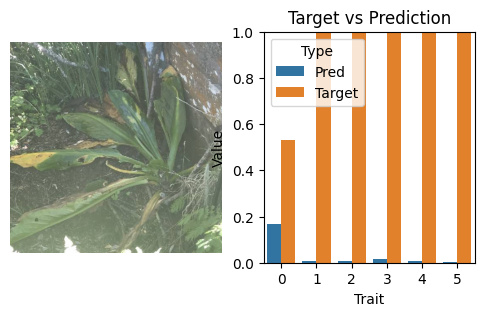

Pred: [-0.16852592 -0.00842561 -0.00857587 -0.01498355 -0.00961967 -0.00410279]
Target: [  0.5317102  22.98637     1.0927594  50.801968    1.0859783 363.36472  ]


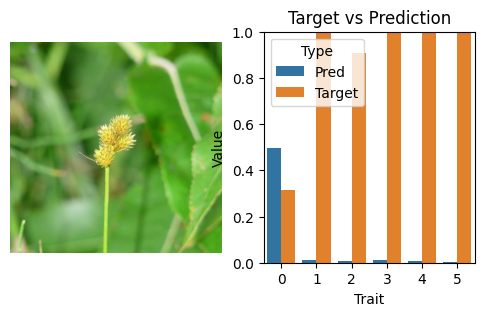

Pred: [-0.49615607 -0.00992814 -0.00800016 -0.01386569 -0.00857638 -0.00392772]
Target: [3.1388885e-01 1.7536665e+01 9.0657532e-01 1.3685272e+00 1.1956744e+00
 7.0916351e+02]


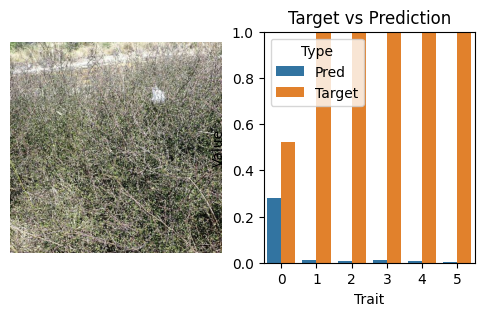

Pred: [ 0.28183943 -0.0098474  -0.00918199 -0.01392159 -0.00721445 -0.00510188]
Target: [5.2402145e-01 1.2960494e+01 6.0011344e+00 3.5661683e+00 1.7337087e+00
 2.0623047e+03]


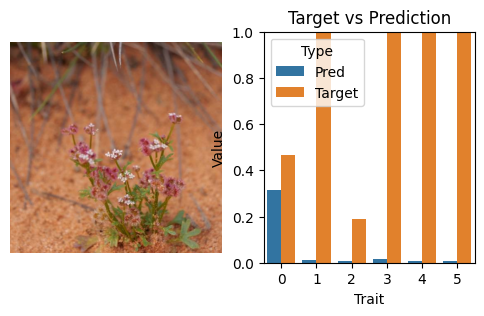

Pred: [ 0.31425232 -0.00981786 -0.00924468 -0.01418281 -0.00706316 -0.00532749]
Target: [4.6538639e-01 1.9153261e+01 1.9035941e-01 1.6554910e+00 1.0184221e+00
 2.6037756e+02]


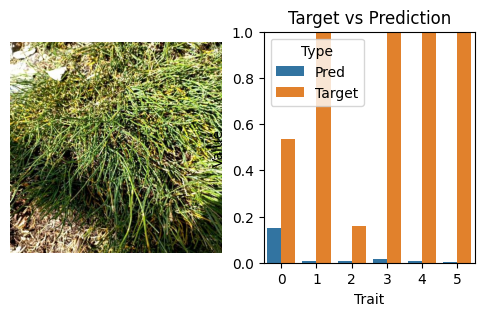

Pred: [ 0.15232706 -0.00864267 -0.00836536 -0.0147199  -0.00897559 -0.00399971]
Target: [  0.53386766   4.487068     0.15682326   8.950629     3.775442
 136.83368   ]


In [63]:
indices = list(range(10))
plot_outputs(indices)

TODO WIP
- Function that takes a batch of preds, targets and plots the images next to a 12-bar bar chart comparing pred/target for each trait, in viz_utils

In [18]:
# Test r2 score
import torch
from torchmetrics import R2Score

r2_score = R2Score(num_outputs=6, multioutput='uniform_average')
torch.manual_seed(42)

# Random (6, 10) tensor
x = torch.rand((10, 6))
y = torch.rand((10, 6))
r2_score(x, y)

print(r2_score.compute())
print(r2_score.compute().mean())

tensor([-1.4577, -3.8493, -1.8109, -0.6907, -1.6428, -2.9837])
tensor(-2.0725)


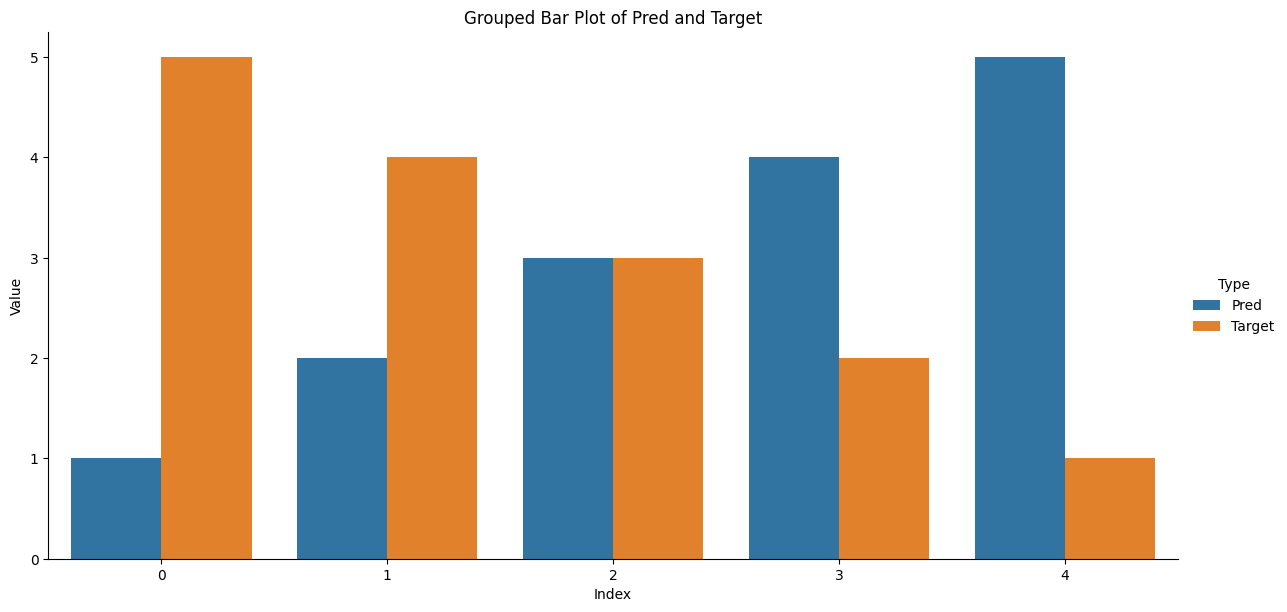

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example arrays
pred = [1, 2, 3, 4, 5]
target = [5, 4, 3, 2, 1]

# Create a DataFrame
data = pd.DataFrame({'Index': range(len(pred)), 'Pred': pred, 'Target': target})

# Melt the DataFrame
data_melted = data.melt(id_vars='Index', value_vars=['Pred', 'Target'], var_name='Type', value_name='Value')

# Plot using catplot
sns.catplot(x='Index', y='Value', hue='Type', kind='bar', data=data_melted, height=6, aspect=2)
plt.title('Grouped Bar Plot of Pred and Target')
plt.show()


In [10]:
# View prediction output
filename = f"data/outputs/predictions_unprocessed.csv"
df = pd.read_csv(filename, index_col=0)

In [11]:
df

,X4_mean,X11_mean,X18_mean,X26_mean,X50_mean,X3112_mean
0,-3.599491,3.138941,2.054839,8.420519,-1.354046,6.378297
1,-9.674857,7.461655,-4.429892,-3.432906,-6.874116,-5.733306
2,-0.063285,3.898765,-4.958216,-1.944139,1.346883,-9.212484
3,-31.294857,14.651109,-8.381123,-10.612426,-18.579450,-16.587717
4,7.400694,-14.334237,-9.874040,0.009341,29.252651,-41.036102
...,...,...,...,...,...,...
6540,-4.239759,5.462224,2.195712,14.795188,-1.815433,8.238374
6541,-10.955884,3.256509,25.863207,32.344574,-0.710265,26.030552
6542,-32.024937,19.630539,-7.306335,-5.805857,-16.950478,-0.515129
6543,-6.821534,11.125561,-6.899391,3.242681,-0.399282,-5.475339


In [13]:
df.to_numpy().shape

(6545, 6)

In [4]:
df.describe()

,Unnamed: 0,X4_mean,X11_mean,X18_mean,X26_mean,X50_mean,X3112_mean
count,6545.000000,6545.000000,6545.000000,6545.000000,6545.000000,6545.000000,6545.000000
mean,3272.000000,-9.186788,8.212137,-1.148116,5.147725,-3.230230,-1.809934
std,1889.523088,11.481974,6.226433,12.060628,14.956299,8.898482,16.762688
min,0.000000,-56.954230,-48.218407,-55.805016,-73.671690,-31.811172,-107.724070
25%,1636.000000,-16.015510,4.372202,-6.293072,-4.613523,-8.992818,-9.345123
50%,3272.000000,-5.788845,7.205521,-3.514538,0.536590,-1.881537,-3.244852
75%,4908.000000,-0.248635,11.179788,-0.952982,13.944089,3.144057,4.353763
max,6544.000000,10.844164,39.659588,100.725395,124.382620,61.971570,109.798390


In [11]:
np.e ** 110

5.920972027664636e+47

In [8]:
df.isna().sum()

Unnamed: 0    0
X4_mean       0
X11_mean      0
X18_mean      0
X26_mean      0
X50_mean      0
X3112_mean    0
dtype: int64

In [7]:
from src.data.helpers.dataset_scaler import Dataset_Scaler

def get_scaler():
    path = "data/processed/latest_scaler.pkl"
    scaler = Dataset_Scaler(exclude_cols=['id'])
    scaler.load_from_pkl(path)
    return scaler

def post_process(exponentiate_targets, predictions_df, scaler):
    if exponentiate_targets:
        # First clamp to avoid high magnitude values
        predictions_df = np.clip(predictions_df, -10, 10)
        predictions_df = np.exp(predictions_df)
    predictions_df = scaler.unscale_df(predictions_df)
    return predictions_df

In [8]:
scaler = get_scaler()
pred_df = post_process(True, df, scaler)

ValueError: operands could not be broadcast together with shapes (6545,7) (163,) (6545,7) 

In [ ]:
def produce_and_save_target_scaler():
    scaler = Dataset_Scaler(exclude_cols=[])
    trait_columns = ['X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean']

    train_path = "data/raw/planttraits2024/train.csv"
    train_df = pd.read_csv(train_path, dtype={"id": str})
    target_df = train_df[trait_columns]
    target_df = scaler.scale_df(target_df)

